In [1]:
!pip install shap

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import shap
import matplotlib.pyplot as plt

In [3]:
# Convert sample data to DataFrames
train_df = pd.read_csv('train.csv')
test_df =pd.read_csv('train.csv')

# Data Preprocessing
def preprocess_data(df):
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})  # Encode Gender
    df = pd.get_dummies(df, columns=['Geography'], drop_first=True)  # One-hot encode Geography
    df = df.drop(['id', 'CustomerId', 'Surname'], axis=1)  # Drop unnecessary columns
    return df

train_df = preprocess_data(train_df)
X = train_df.drop('Exited', axis=1)
y = train_df['Exited']



In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import shap
import matplotlib.pyplot as plt

# Split data into training and validation sets (keeping previous preprocessing)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

# 1. Logistic Regression (Glassbox Model)
log_reg = LogisticRegression(class_weight={0: 1, 1: 1.5}, max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_val)

# 2. Random Forest (Blackbox Model) with Reduced Grid Search
rf = RandomForestClassifier(class_weight={0: 1, 1: 1.5}, random_state=42)
# Reduce parameter grid
param_grid = {
    'n_estimators': [50],  # Only 1 value to minimize computation
    'max_depth': [10],     # Set a reasonable fixed depth
    'min_samples_split': [2]  # Use only 1 split option to reduce combinations
}
grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='f1')  # Reduce cv folds to 3
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_val)

# Evaluation Metrics
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"Performance of {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")
    print(f"AUC-ROC: {roc_auc_score(y_true, y_pred):.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Evaluate Logistic Regression
evaluate_model(y_val, y_pred_log, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_val, y_pred_rf, "Random Forest")

# SHAP Analysis for Random Forest
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_val)

# Global SHAP Summary Plot
shap.summary_plot(shap_values[1], X_val, plot_type="bar")

# Local SHAP Force Plot (for an individual prediction)
# Choose a single instance to explain
i = 0
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][i], X_val.iloc[i], matplotlib=True)

plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance of Logistic Regression:
Accuracy: 0.83
Precision: 0.62
Recall: 0.51
F1 Score: 0.56
AUC-ROC: 0.71
Confusion Matrix:
 [[23860  2192]
 [ 3380  3575]]
Performance of Random Forest:
Accuracy: 0.86
Precision: 0.70
Recall: 0.61
F1 Score: 0.65
AUC-ROC: 0.77
Confusion Matrix:
 [[24261  1791]
 [ 2719  4236]]


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [5]:
# Split data into training and validation sets (assuming preprocessing is done)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert boolean columns to int to ensure compatibility
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include='bool').columns})
X_val = X_val.astype({col: 'int' for col in X_val.select_dtypes(include='bool').columns})

# Confirm data types after conversion
print("X_train types:\n", X_train.dtypes)
print("X_val types:\n", X_val.dtypes)

X_train types:
 CreditScore            int64
Gender                 int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Geography_Germany      int64
Geography_Spain        int64
dtype: object
X_val types:
 CreditScore            int64
Gender                 int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Geography_Germany      int64
Geography_Spain        int64
dtype: object


In [6]:
# Convert boolean columns to int to ensure compatibility
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include='bool').columns})
X_val = X_val.astype({col: 'int' for col in X_val.select_dtypes(include='bool').columns})

# Confirm data types after conversion
print("X_train types:\n", X_train.dtypes)
print("X_val types:\n", X_val.dtypes)

X_train types:
 CreditScore            int64
Gender                 int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Geography_Germany      int64
Geography_Spain        int64
dtype: object
X_val types:
 CreditScore            int64
Gender                 int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Geography_Germany      int64
Geography_Spain        int64
dtype: object


In [7]:
X_val.dtypes

CreditScore            int64
Gender                 int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance of Logistic Regression:
Accuracy: 0.83
Precision: 0.62
Recall: 0.51
F1 Score: 0.56
AUC-ROC: 0.71
Confusion Matrix:
 [[23892  2160]
 [ 3396  3559]]


Performance of Random Forest:
Accuracy: 0.86
Precision: 0.70
Recall: 0.61
F1 Score: 0.65
AUC-ROC: 0.77
Confusion Matrix:
 [[24261  1791]
 [ 2719  4236]]




100%|===================| 66009/66014 [14:06<00:00]        

SHAP values shape: (33007, 11, 2)
Validation data shape: (33007, 11)


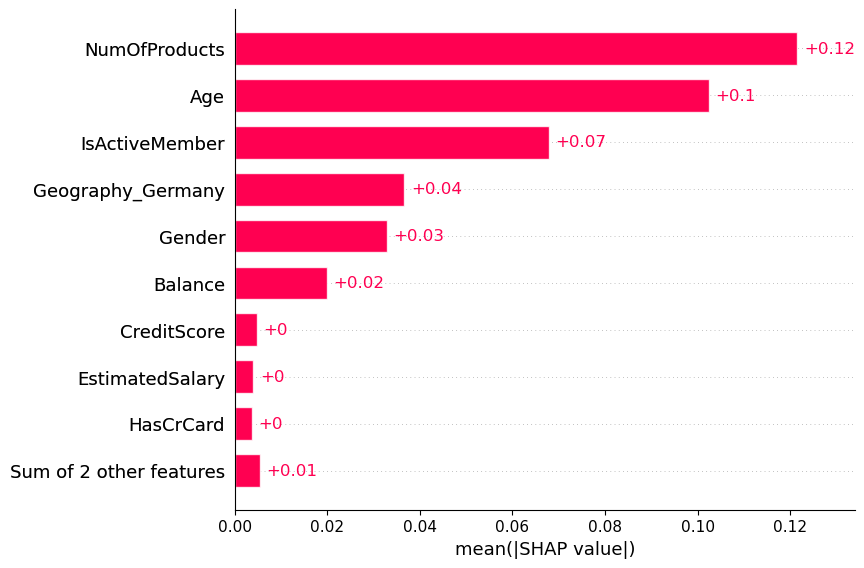

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import shap
import matplotlib.pyplot as plt

# Split data into training and validation sets (assuming preprocessing is done)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert boolean columns to int to ensure compatibility
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include='bool').columns})
X_val = X_val.astype({col: 'int' for col in X_val.select_dtypes(include='bool').columns})

# Model Training

# 1. Logistic Regression (Glassbox Model)
log_reg = LogisticRegression(class_weight={0: 1, 1: 1.5}, max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_val)

# 2. Random Forest (Blackbox Model) with Reduced Grid Search
rf = RandomForestClassifier(class_weight={0: 1, 1: 1.5}, random_state=42)
param_grid = {
    'n_estimators': [50],   
    'max_depth': [10],     
    'min_samples_split': [2] 
}
grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='f1')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_val)

# Evaluation Metrics
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"Performance of {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")
    print(f"AUC-ROC: {roc_auc_score(y_true, y_pred):.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

# Evaluate Logistic Regression
evaluate_model(y_val, y_pred_log, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_val, y_pred_rf, "Random Forest")

# SHAP Analysis for Random Forest using the new Explainer API
explainer = shap.Explainer(best_rf, X_train)
shap_values = explainer(X_val)

# Verify dimensions
print("SHAP values shape:", shap_values.values.shape)
print("Validation data shape:", X_val.shape)

# Select SHAP values for the positive class (class 1) for binary classification
shap_values_class_1 = shap_values[..., 1]

# Global SHAP Summary Plot
shap.plots.bar(shap_values_class_1)

# Local SHAP Force Plot (for an individual prediction)
# Choose a single instance to explain
i = 0
shap.initjs()
shap.plots.force(shap_values_class_1[i])

plt.show()



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance of Logistic Regression:
Accuracy: 0.83
Precision: 0.62
Recall: 0.51
F1 Score: 0.56
AUC-ROC: 0.71
Confusion Matrix:
 [[23892  2160]
 [ 3396  3559]]


Performance of Random Forest:
Accuracy: 0.86
Precision: 0.70
Recall: 0.61
F1 Score: 0.65
AUC-ROC: 0.77
Confusion Matrix:
 [[24261  1791]
 [ 2719  4236]]




100%|===================| 65946/66014 [14:28<00:00]        

SHAP values shape: (33007, 11, 2)
Validation data shape: (33007, 11)


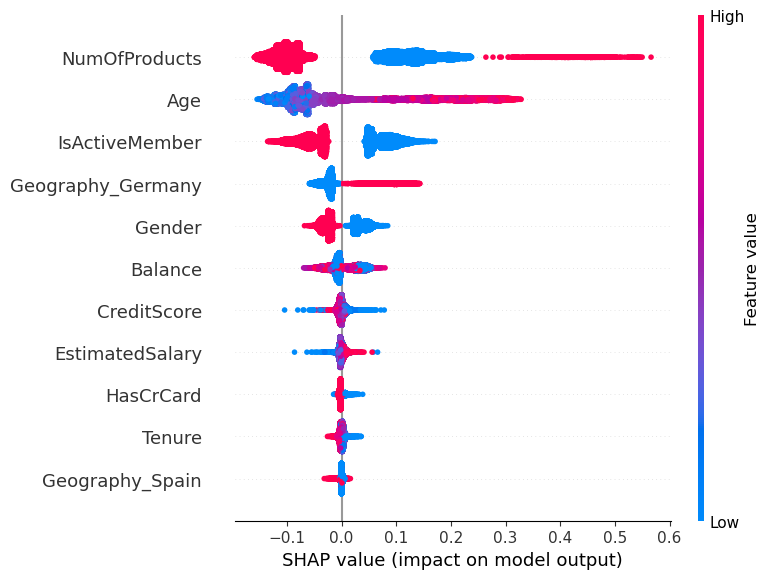

ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import shap
import matplotlib.pyplot as plt

# Split data into training and validation sets (assuming preprocessing is done)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert boolean columns to int to ensure compatibility
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include='bool').columns})
X_val = X_val.astype({col: 'int' for col in X_val.select_dtypes(include='bool').columns})

# Model Training

# 1. Logistic Regression (Glassbox Model)
log_reg = LogisticRegression(class_weight={0: 1, 1: 1.5}, max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_val)

# 2. Random Forest (Blackbox Model) with Reduced Grid Search
rf = RandomForestClassifier(class_weight={0: 1, 1: 1.5}, random_state=42)
param_grid = {
    'n_estimators': [50],   
    'max_depth': [10],     
    'min_samples_split': [2] 
}
grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='f1')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_val)

# Evaluation Metrics
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"Performance of {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")
    print(f"AUC-ROC: {roc_auc_score(y_true, y_pred):.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

# Evaluate Logistic Regression
evaluate_model(y_val, y_pred_log, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_val, y_pred_rf, "Random Forest")

# SHAP Analysis for Random Forest using the new Explainer API
explainer = shap.Explainer(best_rf, X_train)
shap_values = explainer(X_val)

# Verify dimensions
print("SHAP values shape:", shap_values.values.shape)
print("Validation data shape:", X_val.shape)

# Select SHAP values for the positive class (class 1) for binary classification
shap_values_class_1 = shap_values[..., 1]

# --- Global SHAP Summary Plot ---
# Global summary plot of SHAP values for class 1 (positive class in binary classification)
shap.summary_plot(shap_values_class_1, X_val)

# --- Local SHAP Force Plot ---
# Choose an instance from the validation set (you can change the index)
i = 0  # Example: view the first instance
shap.initjs()  # Initialize JavaScript for interactive plots

# Local SHAP Force Plot for the selected instance
# This will generate a static plot if run in a non-interactive environment like a script.
shap.force_plot(explainer.expected_value[1], shap_values_class_1[i], X_val.iloc[i], matplotlib=True)

# If running in an interactive environment like Jupyter, this will be interactive
# If running in a script, you can save the plot as HTML
#shap.save_html("shap_local_plot.html")  # Uncomment to save as HTML if needed

plt.show()

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import shap
import matplotlib.pyplot as plt

# Split data into training and validation sets (assuming preprocessing is done)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert boolean columns to int to ensure compatibility
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include='bool').columns})
X_val = X_val.astype({col: 'int' for col in X_val.select_dtypes(include='bool').columns})

# Model Training

# 1. Logistic Regression (Glassbox Model)
log_reg = LogisticRegression(class_weight={0: 1, 1: 1.5}, max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_val)

# 2. Random Forest (Blackbox Model) with Reduced Grid Search
rf = RandomForestClassifier(class_weight={0: 1, 1: 1.5}, random_state=42)
param_grid = {
    'n_estimators': [50],   
    'max_depth': [10],     
    'min_samples_split': [2] 
}
grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='f1')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_val)

# Evaluation Metrics
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"Performance of {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")
    print(f"AUC-ROC: {roc_auc_score(y_true, y_pred):.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

# Evaluate Logistic Regression
evaluate_model(y_val, y_pred_log, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_val, y_pred_rf, "Random Forest")

# SHAP Analysis for Random Forest using the new Explainer API
explainer = shap.Explainer(best_rf, X_train)
shap_values = explainer(X_val)

# Verify dimensions
print("SHAP values shape:", shap_values.shape)
print("Validation data shape:", X_val.shape)

# --- Global SHAP Summary Plot ---
# Global summary plot of SHAP values for class 1 (positive class in binary classification)
# For binary classification, select the SHAP values for the positive class (index 1)
shap.summary_plot(shap_values.values[:, 1, :], X_val)  # Using .values[:, 1, :] for class 1

# --- Local SHAP Force Plot ---
# Choose an instance from the validation set (you can change the index)
i = 0  # Example: view the first instance
shap.initjs()  # Initialize JavaScript for interactive plots

# Local SHAP Force Plot for the selected instance
# Pass the full explanation for the instance
shap.force_plot(shap_values[i])

# If running in a script, you can save the plot as HTML
# shap.save_html("shap_local_plot.html")  # Uncomment to save as HTML if needed

plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance of Logistic Regression:
Accuracy: 0.83
Precision: 0.62
Recall: 0.51
F1 Score: 0.56
AUC-ROC: 0.71
Confusion Matrix:
 [[23892  2160]
 [ 3396  3559]]


Performance of Random Forest:
Accuracy: 0.86
Precision: 0.70
Recall: 0.61
F1 Score: 0.65
AUC-ROC: 0.77
Confusion Matrix:
 [[24261  1791]
 [ 2719  4236]]




100%|===================| 66012/66014 [14:36<00:00]        

SHAP values shape: (33007, 11, 2)
Validation data shape: (33007, 11)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.